In [1]:
import pandas as pd
import missingno as msno
import gc
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
import statistics as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import defaultdict
import itertools
import pickle 

In [4]:
gc.collect()

8185

In [2]:
ds = pd.read_csv('E:\\Dataset\\dataset.csv')

C:\Users\Jack\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,16,17,19,40,141,142,143,144,145,146,147,148,149,150,151,152,184,193,220,221,245,273,283,284,344,370,375,381,432,447) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


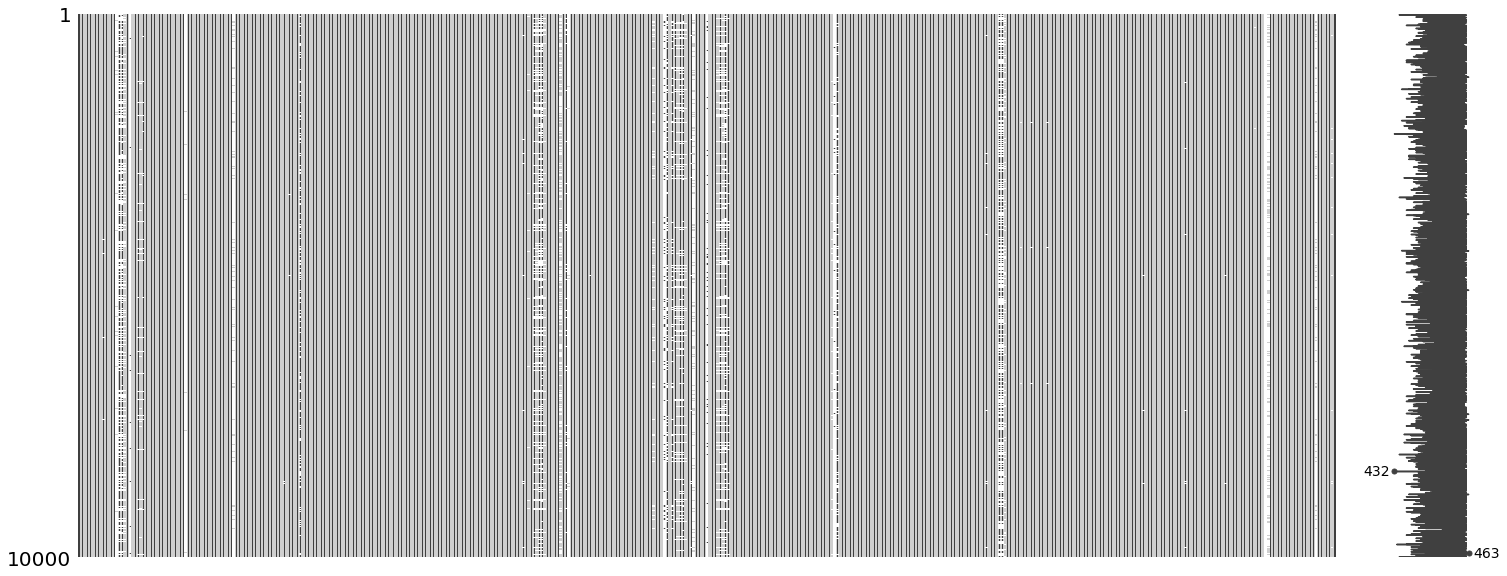

In [6]:
%matplotlib inline
msno.matrix(ds.sample(10000))

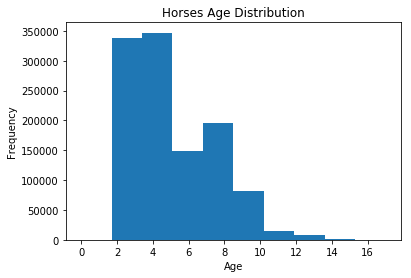

In [7]:
HorsesAge = plt.figure()
ax = HorsesAge.add_subplot(1,1,1)
ax.hist(ds['Age'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Horses Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

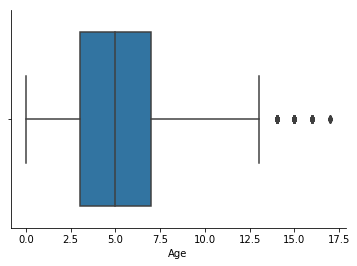

5.0

In [8]:
sns.boxplot(ds['Age'])
sns.despine()
plt.show()
stats.median(ds['Age'])

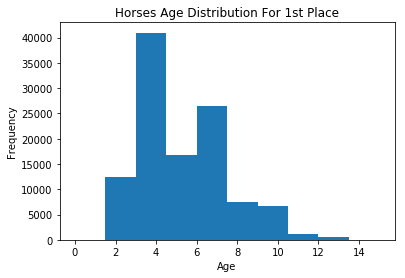

In [9]:
champions_age = plt.figure()
ax = champions_age.add_subplot(1,1,1)
ax.hist(ds[ds['Result'] == '1']['Age'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Horses Age Distribution For 1st Place")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

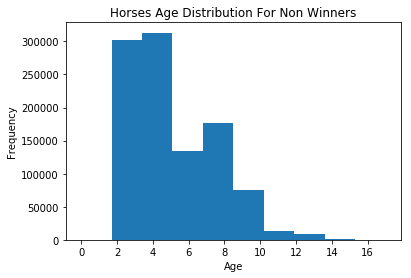

In [10]:
losers_age = plt.figure()
ax = losers_age.add_subplot(1,1,1)
ax.hist(ds[ds['Result'] != '1']['Age'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Horses Age Distribution For Non Winners")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

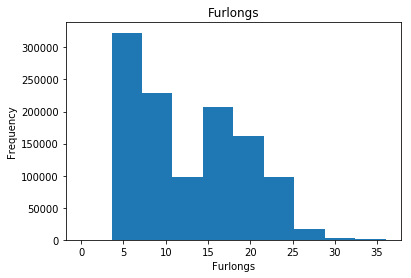

In [11]:
Furlongs = plt.figure()
ax = Furlongs.add_subplot(1,1,1)
ax.hist(ds['Furlongs'])
plt.title("Furlongs")
plt.xlabel("Furlongs")
plt.ylabel("Frequency")
plt.show()

In [12]:
ds.columns[ds.isnull().any()]

Index(['Actual Going', 'Auction', 'BHAclassLast', 'BHAclassLastType',
       'BHAclassToday', 'Beginner', 'Betfair Place S.P.', 'Betfair Placed',
       'Betfair Win S.P.', 'Claiming', 'ClassDifferentialOneRace',
       'ClsRanking', 'ConnRanking', 'Country', 'Dam', 'FrmRanking', 'Gender',
       'Going', 'Going2RunsAgo', 'Going3RunsAgo', 'Going4RunsAgo',
       'Going5RunsAgo', 'GoingLastTime', 'Handicap', 'HorseForm',
       'HunterChase', 'Jockey', 'JockeyRanking', 'LastTimeClassDrop',
       'LastTimePositionRaceType', 'LastTimePosn', 'LastTimeWeightDrop',
       'LengthsWonLost2RunsAgo', 'LengthsWonLost3RunsAgo',
       'LengthsWonLost4RunsAgo', 'LengthsWonLost5RunsAgo',
       'LengthsWonLostLastRun', 'LstRanking', 'Maiden', 'Novice',
       'Position2RunsAgo', 'Position3RunsAgo', 'Position4RunsAgo',
       'Position5RunsAgo', 'PositionLastTime', 'Prize', 'RAdjRanking',
       'RawRanking', 'S.P.', 'Selling', 'Sire', 'SpdRanking', 'StallNumber',
       'StallPercentage', 'Systems

In [3]:
val = {'Actual Going': 'UNKNWN'}
ds.fillna(value=val, inplace=True)
ds['Actual Going'].isna().any()

False

In [4]:
val = {'Going': 'UNKNWN'}
ds.fillna(value=val, inplace=True)
ds['Going'].isna().any()

False

In [5]:
val = {'Beginner': 'No', 'Maiden':'No','Novice':'No'}
ds.fillna(value=val, inplace=True)
ds['Beginner'].isna().any()


False

In [6]:
ds['Maiden'].isna().any()

False

In [7]:
ds['Novice'].isna().any()

False

In [8]:
val = {'Country': 'UK'}
ds.fillna(value=val, inplace=True)
ds['Country'].isna().any()

False

In [9]:
val = {'Auction': 'NonAuction'}
ds.fillna(value=val, inplace=True)
ds['Auction'].isna().any()

False

In [10]:
val = {'Gender': '-'}
ds.fillna(value=val, inplace=True)
ds['Gender'].isna().any()

False

In [11]:
val = {'Going2RunsAgo': 'unknown','Going3RunsAgo': 'unknown','Going4RunsAgo': 'unknown','Going5RunsAgo': 'unknown','GoingLastTime': 'unknown'}
ds.fillna(value=val, inplace=True)
ds['Going2RunsAgo'].isna().any()

False

In [12]:
ds['Going3RunsAgo'].isna().any()

False

In [13]:
ds['Going4RunsAgo'].isna().any()

False

In [14]:
ds['Going5RunsAgo'].isna().any()

False

In [15]:
ds['GoingLastTime'].isna().any()

False

In [16]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.', 'Claiming',
       'ClassDifferentialOneRace', 'ClsRanking', 'ConnRanking', 'Dam',
       'FrmRanking', 'Handicap', 'HorseForm', 'HunterChase', 'Jockey',
       'JockeyRanking', 'LastTimeClassDrop', 'LastTimePositionRaceType',
       'LastTimePosn', 'LastTimeWeightDrop', 'LengthsWonLost2RunsAgo',
       'LengthsWonLost3RunsAgo', 'LengthsWonLost4RunsAgo',
       'LengthsWonLost5RunsAgo', 'LengthsWonLostLastRun', 'LstRanking',
       'Position2RunsAgo', 'Position3RunsAgo', 'Position4RunsAgo',
       'Position5RunsAgo', 'PositionLastTime', 'Prize', 'RAdjRanking',
       'RawRanking', 'S.P.', 'Selling', 'Sire', 'SpdRanking', 'StallNumber',
       'StallPercentage', 'Systems', 'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR',
       'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins',
       'TJCWins', 'TJPL', 'TJROI', 'TJRuns', 'TJSR', 'TJWins', 'TrFormRankin

In [17]:
val = {'Handicap': 'NonHandicap'}
ds.fillna(value=val, inplace=True)
ds['Handicap'].isna().any()

False

In [18]:
val = {'Selling': 'NonSelling'}
ds.fillna(value=val, inplace=True)
ds['Selling'].isna().any()

False

In [19]:
ds.drop(columns=['WRITE_IN_DURATION_HERE', 'WRITE_FAVOURITE_RANKING','ValueOdds_BetfairFormat'], inplace=True)


In [20]:
val = {'Jockey': 'unknown'}
ds.fillna(value=val, inplace=True)
ds['Jockey'].isna().any()

False

In [21]:
val = {'Dam': 'UNKNOWN','Sire': 'UNKNOWN'}
ds.fillna(value=val, inplace=True)
ds['Dam'].isna().any()

False

In [22]:
ds['Sire'].isna().any()

False

In [23]:
val = {'Wearing': '0'}
ds.fillna(value=val, inplace=True)
ds['Wearing'].isna().any()

False

In [24]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.', 'Claiming',
       'ClassDifferentialOneRace', 'ClsRanking', 'ConnRanking', 'FrmRanking',
       'HorseForm', 'HunterChase', 'JockeyRanking', 'LastTimeClassDrop',
       'LastTimePositionRaceType', 'LastTimePosn', 'LastTimeWeightDrop',
       'LengthsWonLost2RunsAgo', 'LengthsWonLost3RunsAgo',
       'LengthsWonLost4RunsAgo', 'LengthsWonLost5RunsAgo',
       'LengthsWonLostLastRun', 'LstRanking', 'Position2RunsAgo',
       'Position3RunsAgo', 'Position4RunsAgo', 'Position5RunsAgo',
       'PositionLastTime', 'Prize', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'StallNumber', 'StallPercentage', 'Systems', 'TJCPL',
       'TJCROI', 'TJCRuns', 'TJCSR', 'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns',
       'TJCTypeSR', 'TJCTypeWins', 'TJCWins', 'TJPL', 'TJROI', 'TJRuns',
       'TJSR', 'TJWins', 'TrFormRanking', 'Trainer', 'TrainerCalendarRuns',
       'Tr

In [25]:
val = {'Claiming': 'NotClaiming'}
ds.fillna(value=val, inplace=True)
ds['Claiming'].isna().any()

False

In [26]:
ds.drop(columns=['ClassDifferentialOneRace'], inplace=True)

In [27]:
val = {'ClsRanking': 0}
ds.fillna(value=val, inplace=True)
ds['ClsRanking'].isna().any()

False

In [29]:
val = {'Position2RunsAgo': 0, 'Position3RunsAgo':0, 'Position4RunsAgo':0,
       'Position5RunsAgo': 0, 'PositionLastTime':0,}
ds.fillna(value = val, inplace=True)

In [30]:
val = {'HunterChase': 'No'}
ds.fillna(value=val, inplace=True)
ds['HunterChase'].isna().any()

False

In [31]:
val = {'FrmRanking': 0}
ds.fillna(value=val, inplace=True)
ds['FrmRanking'].isna().any()

False

In [32]:
val = {'ConnRanking': 0}
ds.fillna(value=val, inplace=True)
ds['ConnRanking'].isna().any()

False

In [33]:
val = {'HorseForm': '0'}
ds.fillna(value=val, inplace=True)
ds['HorseForm'].isna().any()

False

In [34]:
val = {'StallNumber': 0}
ds.fillna(value=val, inplace=True)
ds['StallNumber'].isna().any()

False

In [35]:
val = {'JockeyRanking': 0, 'TrainerRanking':0}
ds.fillna(value=val, inplace=True)

In [36]:
val = {'Trainer': 'UNKNWN'}
ds.fillna(value=val,inplace=True)

In [37]:
val = {'StallPercentage': '0%'}
ds.fillna(value=val, inplace=True)
ds['StallPercentage'].isna().any()

False

In [38]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LengthsWonLost2RunsAgo',
       'LengthsWonLost3RunsAgo', 'LengthsWonLost4RunsAgo',
       'LengthsWonLost5RunsAgo', 'LengthsWonLostLastRun', 'LstRanking',
       'Prize', 'RAdjRanking', 'RawRanking', 'S.P.', 'SpdRanking', 'Systems',
       'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR', 'TJCTypePL', 'TJCTypeROI',
       'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins', 'TJCWins', 'TJPL', 'TJROI',
       'TJRuns', 'TJSR', 'TJWins', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [39]:
val = {'Prize': 0}
ds.fillna(value=val, inplace=True)
ds['Prize'].isna().any()

False

In [40]:
val = { 'LengthsWonLost2RunsAgo':0,
       'LengthsWonLost3RunsAgo':0, 'LengthsWonLost4RunsAgo':0,
       'LengthsWonLost5RunsAgo':0, 'LengthsWonLostLastRun':0,}
ds.fillna(value=val,inplace=True)

In [41]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR',
       'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins',
       'TJCWins', 'TJPL', 'TJROI', 'TJRuns', 'TJSR', 'TJWins', 'TrFormRanking',
       'TrainerCalendarRuns', 'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [42]:
val = { 'TJCPL':0, 'TJCROI':0, 'TJCRuns':0, 'TJCSR':0,
       'TJCTypePL':0, 'TJCTypeROI':0, 'TJCTypeRuns':0, 'TJCTypeSR':0, 'TJCTypeWins':0,
       'TJCWins':0, 'TJPL':0, 'TJROI':0, 'TJRuns':0, 'TJSR':0, 'TJWins':0}
ds.fillna(value=val,inplace=True)

In [43]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [44]:
ds.drop(columns=['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'], inplace=True)

In [47]:
for index,row in ds.iterrows():
    label = row['Result']
    if label != '1':
        newLabel = '0' 
        ds.at[index, 'Result'] = newLabel

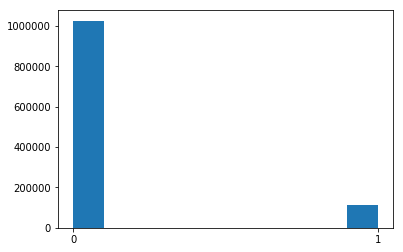

In [48]:
Winners= plt.figure()
ax = Winners.add_subplot(1,1,1)
ax.hist(ds['Result'])
plt.show()

In [ ]:

# for col in X_test.columns.values:
#     if X_test[col].dtypes=='object':
#         print("%a" %col)

In [ ]:
# file = open('data.txt','w')
# for col in X_test.columns.values:
#     file.write("%a," %col)

# file.close

In [49]:
X = ds[[' Duration',' LengthsBehind',' LengthsBehindTotal',' UKHR_CourseID',' UKHR_EntryID',' UKHR_HorseID',' UKHR_JockeyID',' UKHR_TrainerID','Actual Going','Actual Runners','Age','Alarms','Allowances','Auction','BST_GMT','Beginner','BetFairSPForecastPlacePrice','BetFairSPForecastWinPrice','BetterClassWeightWin','BetterClassWeightWinDaysAgo','BetterClassWeightWinRacesAgo','BetterClassWeightWinType','BetterClassWeightWinTypeDaysAgo','BetterClassWeightWinTypeRacesAgo','BetterClassWin','BetterClassWinDaysAgo','BetterClassWinRacesAgo','BetterClassWinType','BetterClassWinTypeDaysAgo','BetterClassWinTypeRacesAgo','CSVversion','CardNumber','ChaseJumpingAbility','Claiming','Class','ClassDiffAverage','ClassDiffAverage1Year','ClassDiffDifference','ClassDiffDifference1Year','ClassDiffRuns','ClassDiffRuns1Year','ClassDiffTotal','ClassDiffTotal1Year','ClassDiffWinsAverage','ClassDiffWinsAverage1Year','ClassDiffWinsDifference','ClassDiffWinsDifference1Year','ClassDiffWinsRuns','ClassDiffWinsRuns1Year','ClassDiffWinsTotal','ClassDiffWinsTotal1Year','ClassPosition','ClassWeightDiffAverage','ClassWeightDiffAverage1Year','ClassWeightDiffDifference','ClassWeightDiffDifference1Year','ClassWeightDiffRuns','ClassWeightDiffRuns1Year','ClassWeightDiffTotal','ClassWeightDiffTotal1Year','ClassWeightDiffWinsAverage','ClassWeightDiffWinsAverage1Year','ClassWeightDiffWinsDifference','ClassWeightDiffWinsDifference1Year','ClassWeightDiffWinsRuns','ClassWeightDiffWinsRuns1Year','ClassWeightDiffWinsTotal','ClassWeightDiffWinsTotal1Year','ClsAdvantage','ClsRanking','ConnAdvantage','ConnRanking','ConnectionsRating','Country','CourseWins','Dam','Dam_AdjacentGoing_AE','Dam_AdjacentGoing_PL','Dam_AdjacentGoing_ROI','Dam_AdjacentGoing_Run','Dam_AdjacentGoing_SR','Dam_AdjacentGoing_Win','Dam_Age_AE','Dam_Age_PL','Dam_Age_ROI','Dam_Age_Run','Dam_Age_SR','Dam_Age_Win','Dam_All_AE','Dam_All_PL','Dam_All_ROI','Dam_All_Run','Dam_All_SR','Dam_All_Win','Dam_DistanceRange_AE','Dam_DistanceRange_PL','Dam_DistanceRange_ROI','Dam_DistanceRange_Run','Dam_DistanceRange_SR','Dam_DistanceRange_Win','Dam_Distance_AE','Dam_Distance_PL','Dam_Distance_ROI','Dam_Distance_Run','Dam_Distance_SR','Dam_Distance_Win','Dam_GoingDistance_AE','Dam_GoingDistance_PL','Dam_GoingDistance_ROI','Dam_GoingDistance_Run','Dam_GoingDistance_Win','Dam_Going_AE','Dam_Going_Distance_SR','Dam_Going_PL','Dam_Going_ROI','Dam_Going_Run','Dam_Going_SR','Dam_Going_Win','Dam_RaceClass_AE','Dam_RaceClass_PL','Dam_RaceClass_ROI','Dam_RaceClass_Run','Dam_RaceClass_SR','Dam_RaceClass_Win','Dam_RaceType_AE','Dam_RaceType_PL','Dam_RaceType_ROI','Dam_RaceType_Run','Dam_RaceType_SR','Dam_RaceType_Win','Date','DaysSinceLastRun','DaysSincePreviousTrainerWin','DifferentialRankingClass1Year','DifferentialRankingClass1YearWins','DifferentialRankingClass5Years','DifferentialRankingClass5YearsWins','DifferentialRankingClassWeight1Year','DifferentialRankingClassWeight1YearWins','DifferentialRankingClassWeight5Years','DifferentialRankingClassWeight5YearsWins','DifferentialRankingWeight1Year','DifferentialRankingWeight1YearWins','DifferentialRankingWeight5Years','DifferentialRankingWeight5YearsWins','Distance2RunsAgo','Distance3RunsAgo','Distance4RunsAgo','Distance5RunsAgo','DistanceLastTime','DistanceRegression','DistanceRuns','DistanceWins','ElapsedDays','FCPAdvantage','ForecastSP','FormLastRun','FormTrend','FrmAdvantage','FrmRanking','Furlongs','Gender','Going','Going2RunsAgo','Going3RunsAgo','Going4RunsAgo','Going5RunsAgo','GoingLastTime','GoingRegression','GoingRuns','GoingWins','HCPAdvantage','HCPRanking','Handicap','Horse','HorseForm','HunterChase','JCPL','JCROI','JCRuns','JCSR','JCWins','Jockey','JockeyAdvantage','JockeyRanking','JockeyRating','JumpAdvantage','KouldsScore_Age_Dam','KouldsScore_Age_Sire','KouldsScore_All_Dam','KouldsScore_All_Sire','KouldsScore_Distance20pc_Dam','KouldsScore_Distance20pc_Sire','KouldsScore_Distance_Dam','KouldsScore_Distance_Sire','KouldsScore_GoingBand_Dam','KouldsScore_GoingBand_Sire','KouldsScore_GoingDistance_Dam','KouldsScore_GoingDistance_Sire','KouldsScore_Going_Dam','KouldsScore_Going_Sire','KouldsScore_RaceClass_Dam','KouldsScore_RaceClass_Sire','KouldsScore_RaceType_Dam','KouldsScore_RaceType_Sire','KouldsScore_Total','LastClassDropRank','LastRaceRatingRank','LastTimeDistanceChange','LastTimeJockeyChange','LastTimeLengths','LastTimeTrainerChange','LengthsWonLost2RunsAgo','LengthsWonLost3RunsAgo','LengthsWonLost4RunsAgo','LengthsWonLost5RunsAgo','LengthsWonLostLastRun','LstAdvantage','Maiden','MaxAge','MeanWeight','Meeting','MinAge','Novice','NumberOfResults','Penalties','PlacePositions','Position2RunsAgo','Position3RunsAgo','Position4RunsAgo','Position5RunsAgo','PositionLastTime','Prize','RAdj Advantage','RDistanceRanking','RGoingRanking','Race1RunAgo','Race1RunAgoRaceClass','Race1RunAgoRaceClassType','Race1RunAgoRaceType','Race2RunsAgo','Race2RunsAgoRaceClass','Race2RunsAgoRaceClassType','Race2RunsAgoRaceType','Race3RunsAgo','Race3RunsAgoRaceClass','Race3RunsAgoRaceClassType','Race3RunsAgoRaceType','Race4RunsAgo','Race4RunsAgoRaceClass','Race4RunsAgoRaceClassType','Race4RunsAgoRaceType','Race5RunsAgo','Race5RunsAgoRaceClass','Race5RunsAgoRaceClassType','Race5RunsAgoRaceType','RaceClass','RaceType','RacesSincePreviousTrainerWin','Rating','RatingAdvantage','RatingsPosition','Raw Advantage','RawAdjustedForAgeAndWeight','RawRating','RecentWins','Runners','Selling','Sire','Sire_AdjacentGoing_AE','Sire_AdjacentGoing_PL','Sire_AdjacentGoing_ROI','Sire_AdjacentGoing_Run','Sire_AdjacentGoing_SR','Sire_AdjacentGoing_Win','Sire_Age_AE','Sire_Age_PL','Sire_Age_ROI','Sire_Age_Run','Sire_Age_SR','Sire_Age_Win','Sire_All_AE','Sire_All_PL','Sire_All_ROI','Sire_All_Run','Sire_All_SR','Sire_All_Win','Sire_DistanceRange_AE','Sire_DistanceRange_PL','Sire_DistanceRange_ROI','Sire_DistanceRange_Run','Sire_DistanceRange_SR','Sire_DistanceRange_Win','Sire_Distance_AE','Sire_Distance_PL','Sire_Distance_ROI','Sire_Distance_Run','Sire_Distance_SR','Sire_Distance_Win','Sire_GoingDistance_AE','Sire_GoingDistance_PL','Sire_GoingDistance_ROI','Sire_GoingDistance_Run','Sire_GoingDistance_SR','Sire_GoingDistance_Win','Sire_Going_AE','Sire_Going_PL','Sire_Going_ROI','Sire_Going_Run','Sire_Going_SR','Sire_Going_Win','Sire_RaceClass_AE','Sire_RaceClass_PL','Sire_RaceClass_ROI','Sire_RaceClass_Run','Sire_RaceClass_SR','Sire_RaceClass_Win','Sire_RaceType_AE','Sire_RaceType_PL','Sire_RaceType_ROI','Sire_RaceType_Run','Sire_RaceType_SR','Sire_RaceType_Win','SpdAdvantage','Speed','SpeedAdvantage','SpeedRating','SpeedRatingRank','StallNumber','StallPercentage','TCPL','TCROI','TCRuns','TCSR','TCWins','TJCPL','TJCROI','TJCRuns','TJCSR','TJCTypePL','TJCTypeROI','TJCTypeRuns','TJCTypeSR','TJCTypeWins','TJCWins','TJPL','TJROI','TJRuns','TJSR','TJWins','TRF02WeeksPL','TRF02WeeksROI','TRF02WeeksRuns','TRF02WeeksSR','TRF02WeeksWins','TRF04WeeksPL','TRF04WeeksROI','TRF04WeeksRuns','TRF04WeeksSR','TRF04WeeksWins','TRF20RunsDays','TRF20RunsPL','TRF20RunsROI','TRF20RunsRuns','TRF20RunsSR','TRF20RunsWins','Time','Time24Hour','Title','TotalWins','TrForm10RunsAgo','TrForm2RunsAgo','TrForm3RunsAgo','TrForm4RunsAgo','TrForm5RunsAgo','TrForm6RunsAgo','TrForm7RunsAgo','TrForm8RunsAgo','TrForm9RunsAgo','TrFormAdvantage','TrFormLastRun','Trainer','Trainer5YearPL','Trainer5YearROI','Trainer5YearReturn','Trainer5YearRuns','Trainer5YearSR','Trainer5YearWins','Trainer7DaysPL','Trainer7DaysROI','Trainer7DaysSR','Trainer7DaysWins','TrainerAdvantage','TrainerCalendarPL','TrainerCalendarROI','TrainerCalendarReturn','TrainerCalendarSR','TrainerCalendarWins','TrainerDaysRuns','TrainerForm','TrainerLast10RunsPL','TrainerLast10RunsROI','TrainerLast10RunsRuns','TrainerLast10RunsSR','TrainerLast10RunsWins','TrainerLast40RunsPL','TrainerLast40RunsROI','TrainerLast40RunsRuns','TrainerLast40RunsSR','TrainerLast40RunsWins','TrainerRanking','TrainerRating','UKHRCardCourseID','UKHRCardHorseID','UKHRCardJockeyID','UKHRCardRaceID','UKHRCardTrainerID','UKHR_DamID','UKHR_RaceID','UKHR_SireID','ValueOdds','ValueOdds_Probability','ValuePlaceOdds','Wearing','WeightDelta','WeightDiffAverage','WeightDiffAverage1Year','WeightDiffDifference','WeightDiffDifference1Year']]
y = ds['Result']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

In [51]:
le=LabelEncoder()
for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values.astype(str))
        X_train[col]=le.transform(X_train[col].astype(str))
        X_test[col]=le.transform(X_test[col].astype(str))

C:\Users\Jack\Anaconda3\lib\site-packages\coconut\icoconut\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jack\Anaconda3\lib\site-packages\coconut\icoconut\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
norm_X_train = normalize(X_train)
norm_X_test = normalize(X_test)

In [53]:
mlp = MLPClassifier()
mlp.fit(norm_X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [54]:
filename = "TrainedModel2.sav"
pickle.dump(mlp, open(filename, 'wb'))

In [55]:
loaded_mlp = pickle.load(open(filename, 'rb'))

In [56]:
prediction = loaded_mlp.predict(norm_X_test)

In [57]:
accuracy = accuracy_score(y_test, prediction)
print(classification_report(y_test, prediction))
print(accuracy)

             precision    recall  f1-score   support

          0       0.90      1.00      0.95    307763
          1       0.00      0.00      0.00     33597

avg / total       0.81      0.90      0.85    341360

0.9015760487461917


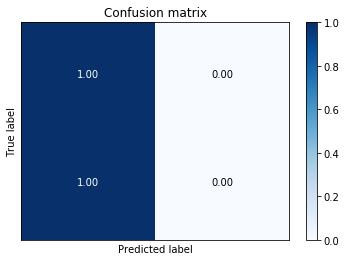

In [59]:
def plot_confusion_matrix(cm, classes, normalize=True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusionMatrix.png')
    plt.show()
    

cmPlot = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cmPlot, classes= [], normalize=True)
